In [291]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from datasketch import MinHash, MinHashLSHForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction import _stop_words
import string
import nltk
nltk.download('wordnet')
nltk.download('punkt')
import re
import sys
import os
import mmh3

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leandrocorona/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leandrocorona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [289]:
pip install datasketch

     |████████████████████████████████| 76 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [290]:
data = pd.read_csv('top30.csv')
data['lenght']=data['content'].apply(len)
data=data.sort_values(by='lenght',ascending=False)[4:]
data = data[data['author']!='Breitbart News']
names = data.author.value_counts().index.tolist()
minarticles = data.author[data.author == names[-1]].value_counts()
#names.remove('Breitbart News')

In [34]:
def shingle(string, delimiter=' '):
    all_shingles = []
    if delimiter != '':
        words_list = string.split(delimiter)
    else:
        words_list = string
    for i in range (len(words_list)-2+1):
        all_shingles.append(delimiter.join(words_list[i:i+2]))
    return list(set(all_shingles))

In [35]:
data['shingle'] = data.content.apply(shingle)

In [36]:
def listhash(l,seed):
	val = 0
	for e in l:
		val = val ^ mmh3.hash(e, seed)
    return val 

In [262]:
def minhash(shingles_list, seed):
    minhash_value = None
    for aShingle in shingles_list:
        hashcode = listhash([aShingle], seed)
        if minhash_value == None or hashcode < minhash_value:
            minhash_value = hashcode
    return minhash_value
def minhash2(shingles_list):
    all_minhash = []
    for i in range(1):
        all_minhash.append(minhash(shingles_list, i))
    return all_minhash

In [263]:
data['minhash'] = data['shingle'].apply(minhash2)

In [264]:
data

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,lenght,shingle,minhash
8943,24870,43623,***MIGRANT CRISIS LIVE WIRE*** – Rolling Cover...,Breitbart,Breitbart London,2016-01-29,2016.0,1.0,NaN,MIGRANT CRISIS LIVE WIRE — This page will h...,68918,"[woman sitting, at a, over because, the satiri...",[-2147215739]
9015,25013,43766,"Explosions Hit Brussels Airport, One Killed - ...",Breitbart,Breitbart London,2016-03-22,2016.0,3.0,NaN,"Multiple blasts rocked Brussels Tuesday, with ...",68792,"[airport”. Sympathy, Passengers were, at a, Le...",[-2147268967]
12844,58970,80815,Which Republicans Oppose Donald Trump? A Cheat...,Atlantic,David A. Graham,2016-10-03,2016.0,10.0,NaN,For us to continue writing great stori...,66968,"[as president, at a, Senate Foreign, “Question...",[-2146069436]
12809,58431,80112,Which Republicans Oppose Donald Trump? A Cheat...,Atlantic,David A. Graham,2016-09-01,2016.0,9.0,NaN,For us to continue writing great stori...,58860,"[as president, at a, Senate Foreign, “Question...",[-2146069436]
12784,58051,79638,Which Republicans Oppose Donald Trump? A Cheat...,Atlantic,David A. Graham,2016-08-11,2016.0,8.0,NaN,For us to continue writing great stori...,56240,"[as president, at a, Senate Foreign, way, too....",[-2146069436]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6253,19804,38548,Cologne Attack Victim Became Pregnant After Be...,Breitbart,Breitbart London,2016-07-17,2016.0,7.0,NaN,The Daily Mail reports:,23,"[Daily Mail, The Daily, Mail reports:]",[263386126]
9605,26104,44858,"PETER HITCHENS: America Isn’t Our Ally, She De...",Breitbart,Breitbart London,2016-04-24,2016.0,4.0,NaN,From the Daily Mail:,20,"[From the, Daily Mail:, the Daily]",[-587018551]
8922,24826,43578,Piers Morgan On Trump: ’A Non-Politician Unfet...,Breitbart,Breitbart London,2016-03-23,2016.0,3.0,NaN,From the Daily Mail:,20,"[From the, Daily Mail:, the Daily]",[-587018551]
9398,25726,44480,Cheney on Hillary Emails: ’Pretty Serious Stuf...,Breitbart,Jeff Poor,2016-01-31,2016.0,1.0,NaN,advertisement,13,[],[None]


In [265]:
df = pd.DataFrame(data[['id', 'author']])

In [267]:
columns = [1]#, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df[columns] = pd.DataFrame(data.minhash.to_list())
df

,id,author,1
8943,43623,Breitbart London,-2.143912e+09
9015,43766,Breitbart London,-2.135698e+09
12844,80815,David A. Graham,-2.133560e+09
12809,80112,David A. Graham,-2.115899e+09
12784,79638,David A. Graham,-2.115845e+09
...,...,...,...
6253,38548,Breitbart London,-2.134048e+09
9605,44858,Breitbart London,-2.145299e+09
8922,43578,Breitbart London,-2.137846e+09
9398,44480,Jeff Poor,-2.119590e+09


In [268]:
def jaccard(name1, name2, data):
    """
    Input:
        - name1 (str): key of the first document S
        - name2 (str): key of the second document T
        - signatures_dict (dict of str:list): dictionary of signatures
    Return: Jaccard similarity between S and T
    """
    signatures_doc1 = np.array(signatures_dict[name1])
    signatures_doc2 = np.array(signatures_dict[name2])
    return len(np.intersect1d(signatures_doc1, signatures_doc2))/len(np.union1d(signatures_doc1, signatures_doc2))

In [269]:
df.dropna(inplace=True)

In [292]:
#Preprocess will split a string of text into individual tokens/shingles based on whitespace.
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [293]:
def get_forest(data, perms):
    minhash = []
    for text in data['content']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
    forest = MinHashLSHForest(num_perm=perms)
    for i,m in enumerate(minhash):
        forest.add(i,m)
    forest.index()
    return forest

In [294]:
permutations = 128
forest = get_forest(data,permutations)

In [305]:
def predict(text, database, perms, num_results, forest): 
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    
    result = database.iloc[idx_array]['author']
    return result

In [312]:
num_recommendations = 5
title = ''
result = predict(title, data, permutations, num_recommendations, forest)
print('\n Top Recommendation(s) is(are) \n', result)


 Top Recommendation(s) is(are) 
 None


In [296]:
data

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,lenght
8943,24870,43623,***MIGRANT CRISIS LIVE WIRE*** – Rolling Cover...,Breitbart,Breitbart London,2016-01-29,2016.0,1.0,NaN,MIGRANT CRISIS LIVE WIRE — This page will h...,68918
9015,25013,43766,"Explosions Hit Brussels Airport, One Killed - ...",Breitbart,Breitbart London,2016-03-22,2016.0,3.0,NaN,"Multiple blasts rocked Brussels Tuesday, with ...",68792
12844,58970,80815,Which Republicans Oppose Donald Trump? A Cheat...,Atlantic,David A. Graham,2016-10-03,2016.0,10.0,NaN,For us to continue writing great stori...,66968
12809,58431,80112,Which Republicans Oppose Donald Trump? A Cheat...,Atlantic,David A. Graham,2016-09-01,2016.0,9.0,NaN,For us to continue writing great stori...,58860
12784,58051,79638,Which Republicans Oppose Donald Trump? A Cheat...,Atlantic,David A. Graham,2016-08-11,2016.0,8.0,NaN,For us to continue writing great stori...,56240
...,...,...,...,...,...,...,...,...,...,...,...
6253,19804,38548,Cologne Attack Victim Became Pregnant After Be...,Breitbart,Breitbart London,2016-07-17,2016.0,7.0,NaN,The Daily Mail reports:,23
9605,26104,44858,"PETER HITCHENS: America Isn’t Our Ally, She De...",Breitbart,Breitbart London,2016-04-24,2016.0,4.0,NaN,From the Daily Mail:,20
8922,24826,43578,Piers Morgan On Trump: ’A Non-Politician Unfet...,Breitbart,Breitbart London,2016-03-23,2016.0,3.0,NaN,From the Daily Mail:,20
9398,25726,44480,Cheney on Hillary Emails: ’Pretty Serious Stuf...,Breitbart,Jeff Poor,2016-01-31,2016.0,1.0,NaN,advertisement,13


In [270]:
X_min = df.drop(['id','author'], axis= 1)
#X_len = X_len.reshape(-1, 1)

y = []
for index in df.author:
    ind = names.index(index)
    y.append(ind)
names = df.author.value_counts().index.tolist()
labels = np.array(names)

In [271]:
# train/test split
from sklearn.model_selection import train_test_split

rs = 42 # reproducible results, set to None for random
(X_train, X_test, y_train, y_test) = train_test_split(
    X_min, y,
    test_size=0.2, stratify=y, random_state=rs)

In [272]:
len(X_train)+len(X_test)

15112

In [273]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1+1
        #print('Confusion matrix, without normalization')

    #print(cm)
    
    fig, ax = plt.subplots()
    #fig = plt.figure(figsize=(500, 200))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    plt.rcParams["figure.figsize"] = (28,16)
    return ax

In [274]:
parameters = {'C': [10e-10, 0.1, 1, 10, 10e10]}
lr = GridSearchCV(LogisticRegression(class_weight='balanced', solver='lbfgs'), 
                  parameters, cv=5)
lr.fit(X_train, y_train)
print(lr.best_params_)

{'C': 1e-09}


                      precision    recall  f1-score   support

             Pam Key       0.00      0.00      0.00       257
    Associated Press       0.00      0.00      0.00       244
    Charlie Spiering       0.00      0.00      0.00       186
       Jerome Hudson       0.00      0.00      0.00       161
        John Hayward       0.00      0.00      0.00       149
     Daniel Nussbaum       0.00      0.00      0.00       147
         AWR Hawkins       0.00      0.00      0.00       144
        Ian Hanchett       0.00      0.00      0.00       129
      Joel B. Pollak       0.00      0.00      0.00       125
Post Editorial Board       0.00      0.00      0.00       124
         Alex Swoyer       0.00      0.00      0.00       121
  Warner Todd Huston       0.00      0.00      0.00       109
           Jeff Poor       0.00      0.00      0.00       101
         Trent Baker       0.00      0.00      0.00        91
    Breitbart London       0.00      0.00      0.00        89
 Kather

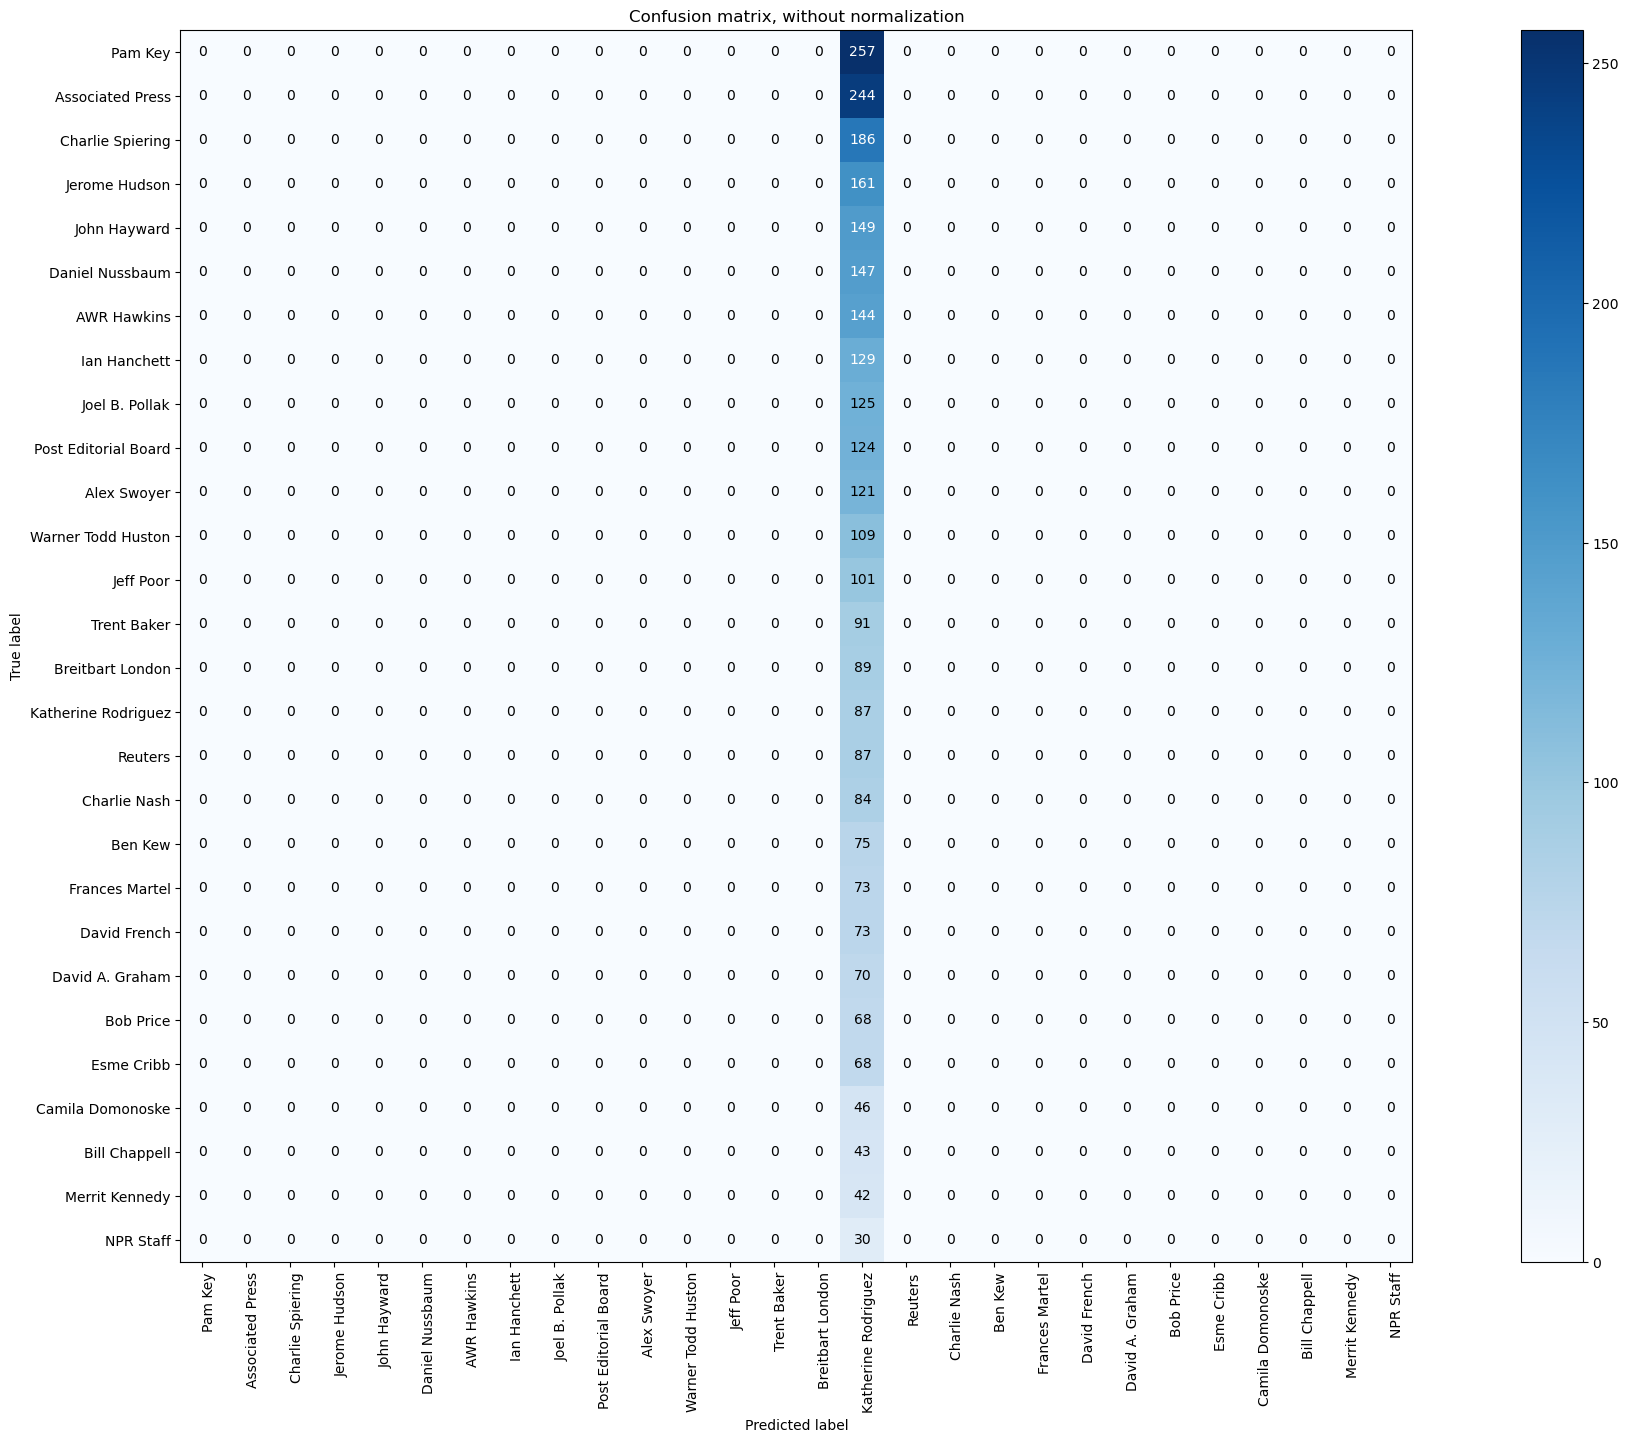

In [275]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))
plot_confusion_matrix(y_test, y_pred, labels)
plt.show()